One of the design constraints is the output power, Po. The secondary winding must be capable of delivering to the load within specified regulation limits. Another constraint is the minimum efficiency of operation, which is dependent upon the maximum power loss that can be allowed in the transformer.

One of the basic steps in transformer design is the selection of proper core material. For a 100 kHz transformer ferrite materials (MnZn or Nizn) can be used. The maximum flux density of these are 0.3-0.5T and 0.3-0.4T respectively.

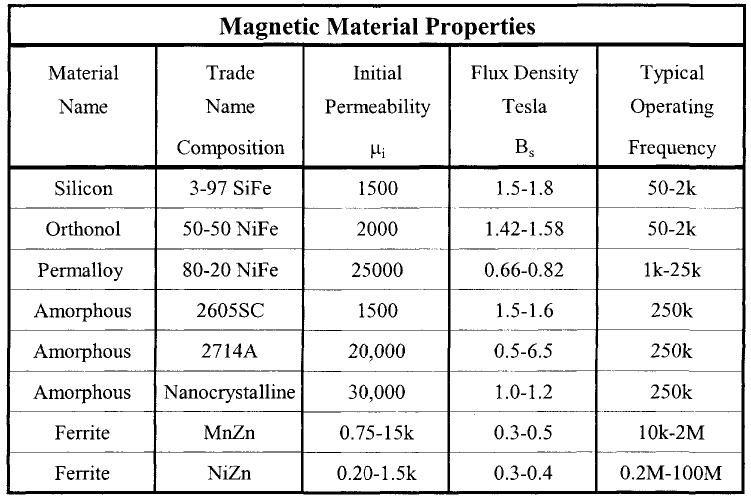

In [68]:
from IPython.display import Image
Image(filename='Magnetic materials.png', width=500, height=500)

Other constraints relate to the volume occupied by the transformer and the weight, since weight minimization is an important goal. Finally, cost effectiveness is always an important consideration.

Depending upon the application, certain ones of these constraints will dominate. Parameters affecting others may then be traded off as necessary to achieve the most desirable design. It is not possible to optimize all parameters in a single design because of their interaction and interdependence.

A rule of thumb can be used for the transformer design process. Still the procedure given in this project is free of assumptions and develops an optimal design with a great accuracy.

Wa...Window area

Ac...Core area

Wa*Ac=Ap...Area Product

Kg...Core geometry (related to the regulation and power handling ability of core)

The above mentioned parameters can be used as tools to simplify and standardize the process of transformer design, without going through a cut-and-try design procedure.

The following instructions are the design specification for a 30kW x-ray transformer, operating at 100kHz, using core geometry, Kg approach.

In [69]:
'''
This part defines the inputs of the design
'''
Vp=417 #Input (primary) voltage
Vs=12500 #Output (secondary) voltage
Pout=30000 #Output power
f=100000 #Frequency
Ta_min=0 #Min ambient temperature
Ta_max=40 #Max ambient temperature

In [70]:
import math
Vp_p=Vp*4/math.pi #Peak primary voltage
Vs_p=Vs*4/math.pi #Peak secondary voltage
Vp_rms=Vp_p/math.sqrt(2) #Primary rms voltage
Vs_rms=Vs_p/math.sqrt(2) #Secondary rms voltage
Ip=Pout/Vp #Primary current
Is=Pout/Vs #Secondary current
Ip_rms=Pout/Vp_rms #Primary rms current
Is=rms=Pout/Vs_rms #Secondary rms current

In [71]:
Alpha=0.5 #Regulation constant
Bm=0.35 #Operating flux density of the core
Eff=0.95 #Efficiency

Efficiency is not a design criterion for this project but the design procedure requires an efficiency to be set initially

In [72]:
Skin_depth=6.62/math.sqrt(f) #Skin depth in cm
print ('Skin_depth=',round(Skin_depth, 4),'cm')
Dw=2*Skin_depth #Wire diameter in cm
print ('Dw=',round(Dw,4),'cm')
Aw=math.pi*Dw*Dw/4 #Bare wire area in cm^2
print ('Aw=',round(Aw,4),'cm^2')

Skin_depth= 0.0209 cm
Dw= 0.0419 cm
Aw= 0.0014 cm^2


In [73]:
Pin=Pout/Eff
Pt=Pin+Pout #Total (apparent) power associated with the core geometry
print ('Pt=',round(Pt,2),'W')

Pt= 61578.95 W


The following calculates the electrical conditions, Ke

In [74]:
Kf=4 #Waveform coefficient for square wave
Ke=0.145*(Kf**2)*(f**2)*(Bm**2)*(10**-4) #Electrical conditions
print ('Ke=',round(Ke))

Ke= 284200


The following calculates the core geometry, Kg. When operating at high frequencies, the window utilization factor, Ku has to be taken into accouınt. When using small bobbin ferrites, the ratio of the bobbin winding area to the core window area is only about 0.6. Operating at 100kHz and having to use AWG26 wire, because of the skin effect, the ratio of the bare copper area to the total area is 0.78. Therefore, the overall window utilization, Ku is reduced. To return the design back to the norm, the core geometry, Kg is to be multiplied by 1.35, and then, the current density, J is calculated, using a window utilization factor of 0.29.

In [82]:
Kg=Pt/(2*Ke*Alpha)
Kg=Kg*1.35
print ('Kg=',round(Kg,3),'cm^5')

Kg= 0.293 cm^5


From the ferrite core database, a suitable core using Kg parameter is selected. The selected core is ETD-44 and it has the following data:

In [87]:
Wtcu=93.2 #Copper weight in grams
Wtce=94.0 #Iron weight in grams
MLT=9.4 #Mean length turn in cm
MPL=10.3 #Magnetic path length in cm
Wa=2.785 #Window area in cm^2
Ac=1.742 #Effective cross section of the core in cm^2
Wa_Ac=1.599,'Wa/Ac'
Ap=4.852 #Area product in cm^4
Kg=0.3595 #Core geometry coefficient in cm^5
At=87.9 #Surface area of the transformer in cm^2
AL=1682 #ınductance factor in mH/1K (nH)

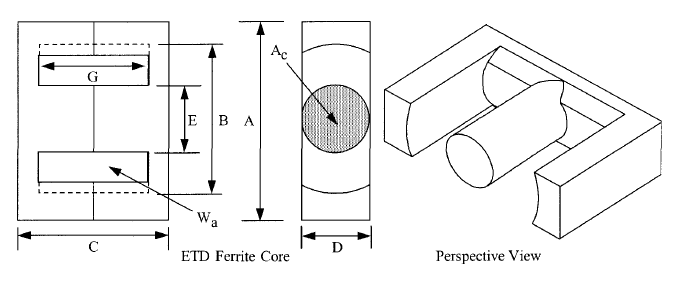

In [89]:
from IPython.display import Image
Image(filename='Dimension outline for ETD ferrite cores.png', width=600)

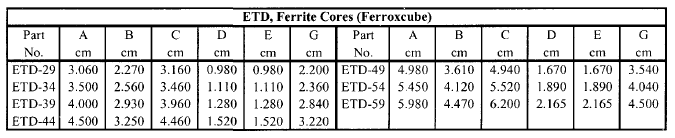

In [91]:
from IPython.display import Image
Image(filename='Dimensional data for ETD ferrite cores.png', width=800)

In [104]:
Np=(Vp*10**4)/(Ac*Bm*f*Kf) #Primary number of turns using Faraday's Law
Np=math.ceil(Np)
print('Np=',Np,'turns')

Np= 18 turns


In [105]:
Ns=Np*Vs/Vp*(1+Alpha/100) #Secondary number of turns is calculated
Ns=math.floor(Ns)
print('Ns=',Ns,'turns')

Ns= 542 turns


In [106]:
Ns1=(Vs*10**4)/(Ac*Bm*f*Kf) #Alternatively secondary number of turns using Faraday's Law
Ns1=math.floor(Ns1)
print('Ns1=',Ns1,'turns')

Ns1= 512 turns


There is a major difference between Ns and Ns1. We know that the basic equation Vs/Vp=Ns/Np should be satisfied. Therefore, Ns=542 is the proper selection for secondary number of turns.

Note for myself: The formula can be added in a better way. Also the checking mechanism can be employed with a code.

In [ ]:
Ip=Pin/Vp #Primary current
Is=Pout/Vs #Secondary current
J=2 #Current density for the copper wire
Awp=Ip/J #Primary wire area in cm^2
Aws=Is/J #Secondary wire area in cm^2
print Awp
print Aws

The power handling capability of a core is related to its area product, Ap, by an equation which may be stated as below:

In [ ]:
Ku=0.4 #Utilization factor (window utilization)
Wa*Ac=(Pt*10^4)/(Bac*f*J*Kf*Ku) #Area product definition comes from this equation
Ap=Wa*Ac #Area product
print Ap

The minimum size of a transformer is usually determined either by a temperature rise limit, or by allowable voltage regulation, assuming that size and weight are to be minimized. Then "alpha" is defined as regulation coefficient.

In [ ]:
Pcu=Pcup+Pcus #Copper losses as the sum of primary and secondary copper losses
Alpha=(Pcu/Po)*100 #Regulation as percentage
print Alpha

Although most transformers are designed for a given temperature rise, they can also be designed for a given regulation.

In [ ]:
MLT= 15 #Mean Length Turn for the core in cm
Kg=(Wa*Ac^2*Ku)/(MLT)
Ke=0.145*Kf^2*f^2*Bm^2*(10^-4)
alpha2=Pt/(2*Kg*Ke) #Another definition for regulation
print Kg
print Ke
print alpha2